In [228]:
import os
import scipy
import pandas as pd
pd.options.display.max_rows = 10
import numpy as np
import requests
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
plt.style.use('seaborn')
%matplotlib inline

In [229]:
url = 'https://www.wholesalesolar.com/list-grid-tie-packages'
response = requests.get(url)
page = response.text
soup = BeautifulSoup(page, "html5lib")

In [198]:
soup.find_all('td')

[<td><a class="single-product-link" data-product_id="31019" href="https://www.wholesalesolar.com/1895201/wholesale-solar/complete-systems/1.8-kw-grid-tied-solar-system-with-enphase-iq7-microinverters-and-6x-heliene-300w-panels">1.8 kW Grid Tied Solar System with Enphase IQ7+ Microinverters and 6x Heliene 300w Panels</a></td>,
 <td>1895201</td>,
 <td><span data-slug="1-8">1.8</span> kW</td>,
 <td><span data-slug="270-0">270.0</span> kWh</td>,
 <td>6 Heliene 300 Black Mono Panels</td>,
 <td>6 Enphase IQ7+ Micro Inverters</td>,
 <td data-sort="3645.95"><span class="woocommerce-Price-amount amount"><span class="woocommerce-Price-currencySymbol">$</span>3,645.95</span></td>,
 <td>heliene</td>,
 <td>enphase</td>,
 <td><a class="single-product-link" data-product_id="31023" href="https://www.wholesalesolar.com/1895203/wholesale-solar/complete-systems/2.07-kw-grid-tied-solar-system-with-enphase-iq7-microinverters-and-6x-astronergy-solar-345w-panels">2.07 kW Grid Tied Solar System with Enphase I

In [199]:
components = [element.text for element in soup.find_all('td')]

In [200]:
components

['1.8 kW Grid Tied Solar System with Enphase IQ7+ Microinverters and 6x Heliene 300w Panels',
 '1895201',
 '1.8 kW',
 '270.0 kWh',
 '6 Heliene 300 Black Mono Panels',
 '6 Enphase IQ7+ Micro Inverters',
 '$3,645.95',
 'heliene',
 'enphase',
 '2.07 kW Grid Tied Solar System with Enphase IQ7+ Microinverters and 6x Astronergy Solar 345w Panels',
 '1895203',
 '2.1 kW',
 '310.5 kWh',
 '6 Astronergy Solar CHSM6612P/HV-345 Silver Poly Panels',
 '6 Enphase IQ7+ Micro Inverters',
 '$3,664.00',
 'astronergy-solar',
 'enphase',
 'Solar Sky 2.07 kW Grid Tied Solar System with SMA and 6x Astronergy Solar 345 Panels',
 '1892025',
 '2.1 kW',
 '310.5 kWh',
 '6 Astronergy Solar CHSM6612P/HV-345 Silver Poly Panels',
 '1 SMA Sunny Boy 3.8-US Inverter',
 '$3,807.00',
 'astronergy-solar',
 'sma',
 'SMA 2.4 kW Grid Tied Solar System with SMA Inverter and 8x Heliene 300w Panels',
 '1892399',
 '2.4 kW',
 '360.0 kWh',
 '8 Heliene 300 Black Mono Panels',
 '1 SMA Sunny Boy 3.8-US Inverter',
 '$4,273.00',
 'helien

In [201]:
n = 9
packages = [components[i * n:(i + 1) * n] for i in range((len(components) + n - 1) // n )]
packages

[['1.8 kW Grid Tied Solar System with Enphase IQ7+ Microinverters and 6x Heliene 300w Panels',
  '1895201',
  '1.8 kW',
  '270.0 kWh',
  '6 Heliene 300 Black Mono Panels',
  '6 Enphase IQ7+ Micro Inverters',
  '$3,645.95',
  'heliene',
  'enphase'],
 ['2.07 kW Grid Tied Solar System with Enphase IQ7+ Microinverters and 6x Astronergy Solar 345w Panels',
  '1895203',
  '2.1 kW',
  '310.5 kWh',
  '6 Astronergy Solar CHSM6612P/HV-345 Silver Poly Panels',
  '6 Enphase IQ7+ Micro Inverters',
  '$3,664.00',
  'astronergy-solar',
  'enphase'],
 ['Solar Sky 2.07 kW Grid Tied Solar System with SMA and 6x Astronergy Solar 345 Panels',
  '1892025',
  '2.1 kW',
  '310.5 kWh',
  '6 Astronergy Solar CHSM6612P/HV-345 Silver Poly Panels',
  '1 SMA Sunny Boy 3.8-US Inverter',
  '$3,807.00',
  'astronergy-solar',
  'sma'],
 ['SMA 2.4 kW Grid Tied Solar System with SMA Inverter and 8x Heliene 300w Panels',
  '1892399',
  '2.4 kW',
  '360.0 kWh',
  '8 Heliene 300 Black Mono Panels',
  '1 SMA Sunny Boy 3.8-

In [203]:
columns = ['System','SKU','Array Size','Monthly Output','Modules','Inverter','Price','MOD OEM',' INV OEM']
df = pd.DataFrame(packages,columns=columns)

In [204]:
df.head()

,System,SKU,Array Size,Monthly Output,Modules,Inverter,Price,MOD OEM,INV OEM
0,1.8 kW Grid Tied Solar System with Enphase IQ7...,1895201,1.8 kW,270.0 kWh,6 Heliene 300 Black Mono Panels,6 Enphase IQ7+ Micro Inverters,"$3,645.95",heliene,enphase
1,2.07 kW Grid Tied Solar System with Enphase IQ...,1895203,2.1 kW,310.5 kWh,6 Astronergy Solar CHSM6612P/HV-345 Silver Pol...,6 Enphase IQ7+ Micro Inverters,"$3,664.00",astronergy-solar,enphase
2,Solar Sky 2.07 kW Grid Tied Solar System with ...,1892025,2.1 kW,310.5 kWh,6 Astronergy Solar CHSM6612P/HV-345 Silver Pol...,1 SMA Sunny Boy 3.8-US Inverter,"$3,807.00",astronergy-solar,sma
3,SMA 2.4 kW Grid Tied Solar System with SMA Inv...,1892399,2.4 kW,360.0 kWh,8 Heliene 300 Black Mono Panels,1 SMA Sunny Boy 3.8-US Inverter,"$4,273.00",heliene,sma
4,SMA 2.13 kW Grid Tied Solar System with SMA In...,1892123,2.1 kW,319.5 kWh,6 REC 355 Black Mono Panels,1 SMA Sunny Boy 3.8-US Inverter,"$4,449.00",rec,sma


In [205]:
df.describe()

,System,SKU,Array Size,Monthly Output,Modules,Inverter,Price,MOD OEM,INV OEM
count,120,120,120,120,120,120,120,120,120
unique,120,120,47,50,50,50,120,3,5
top,11.04 kW Grid Tied Solar System with SolarEdge...,1895333,3.6 kW,720.0 kWh,16 Heliene 300 Black Mono Panels,1 SolarEdge SE3800H HD-Wave SetApp Enabled Inv...,"$19,190.00",heliene,solaredge
freq,1,1,5,5,5,8,1,52,43


In [206]:
df['Price'] = df['Price'].str.replace('$','').str.split().apply(lambda x: float(x[0].replace(',', '')))

In [207]:
df['Monthly Output'] = df['Monthly Output'].astype('str').str.replace('kWh','')

In [208]:
df['Monthly Output'] = pd.to_numeric(df['Monthly Output'], errors='ignore')

In [209]:
df['Monthly Output']

0       270.0
1       310.5
2       310.5
3       360.0
4       319.5
        ...  
115    4140.0
116    4140.0
117    4260.0
118    4260.0
119    2025.0
Name: Monthly Output, Length: 120, dtype: float64

Text(0, 0.5, 'Price')

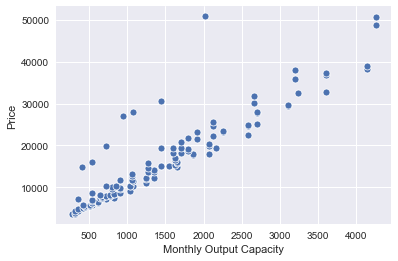

In [210]:
x = df['Monthly Output']
y = df['Price']
sns.scatterplot(x,y)
plt.xlabel("Monthly Output Capacity")
plt.ylabel("Price")

In [160]:
plt.savefig('hardwarecosts.png')

<Figure size 432x288 with 0 Axes>

In [211]:
df['MOD OEM'].astype('category')

0               heliene
1      astronergy-solar
2      astronergy-solar
3               heliene
4                   rec
             ...       
115    astronergy-solar
116    astronergy-solar
117                 rec
118                 rec
119             heliene
Name: MOD OEM, Length: 120, dtype: category
Categories (3, object): [astronergy-solar, heliene, rec]

In [212]:
df.corr(method='pearson')

,Monthly Output,Price
Monthly Output,1.000000,0.907147
Price,0.907147,1.000000


In [213]:
def get_module_quantity(modules):
    modules.split()
    value = modules[0]
    return int(value)

In [214]:
df['Module Qty'] = df['Modules'].apply(get_module_quantity)

In [215]:
df.dtypes

System             object
SKU                object
Array Size         object
Monthly Output    float64
Modules            object
Inverter           object
Price             float64
MOD OEM            object
 INV OEM           object
Module Qty          int64
dtype: object

In [216]:
df = df.rename(columns=lambda x: x.strip())

In [217]:
df['INV OEM'].astype('category')

0        enphase
1        enphase
2            sma
3            sma
4            sma
         ...    
115    solaredge
116      enphase
117    solaredge
118      enphase
119             
Name: INV OEM, Length: 120, dtype: category
Categories (5, object): [, enphase, outback-power, sma, solaredge]

In [219]:
df['MOD OEM'].astype('category')

0               heliene
1      astronergy-solar
2      astronergy-solar
3               heliene
4                   rec
             ...       
115    astronergy-solar
116    astronergy-solar
117                 rec
118                 rec
119             heliene
Name: MOD OEM, Length: 120, dtype: category
Categories (3, object): [astronergy-solar, heliene, rec]

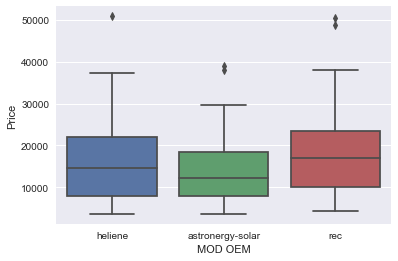

In [220]:
sns.boxplot(x='MOD OEM',y='Price',data=df)

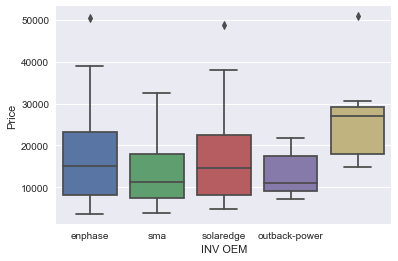

In [221]:
sns.boxplot(x='INV OEM',y='Price',data=df)

In [222]:
df.groupby(['INV OEM','MOD OEM']).size()

INV OEM        MOD OEM         
               heliene              7
enphase        astronergy-solar    14
               heliene             14
               rec                 12
outback-power  heliene              6
                                   ..
sma            heliene             10
               rec                  6
solaredge      astronergy-solar    14
               heliene             15
               rec                 14
Length: 11, dtype: int64

In [224]:
df['INV OEM'].dropna

<bound method Series.dropna of 0        enphase
1        enphase
2            sma
3            sma
4            sma
         ...    
115    solaredge
116      enphase
117    solaredge
118      enphase
119             
Name: INV OEM, Length: 120, dtype: object>

In [231]:
sns.relplot(x="Price", y="Monthly Output", hue="INV OEM", size="weight", sizes=(40, 400), alpha=.5, palette="muted", 
            height=6, data=df)

ValueError: Could not interpret input 'weight'

0        enphase
1        enphase
2            sma
3            sma
4            sma
         ...    
115    solaredge
116      enphase
117    solaredge
118      enphase
119             
Name: INV OEM, Length: 120, dtype: object